In [ ]:
# Experiment 4 KD with a much smaller model as student

In [6]:
# Split the training data into validation set and training set use a stratified k fold 
import numpy as np
from sklearn.model_selection import KFold
import pandas as pd
import sklearn

from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
california_housing_data_train = pd.read_csv('Data/california_housing_train.txt')
california_housing_data_test = pd.read_csv('Data/california_housing_test.txt')

# This dataset have strong outliers due to the hard limit of the housing price
# remove those from the training set
california_housing_data_train = california_housing_data_train[california_housing_data_train['MedHouseVal'] < 5]  
print(california_housing_data_train.shape)

(15722, 9)


In [4]:
# # Perform the stratified 10 fold cross validation
# number_of_folds = 10

# kfolds = KFold(n_splits=number_of_folds)

x_train = california_housing_data_train.iloc[:,0:7].to_numpy()
y_train = california_housing_data_train.iloc[:,-1].to_numpy()

x_test = california_housing_data_test.iloc[:,0:7].to_numpy()
y_test = california_housing_data_test.iloc[:,-1].to_numpy()

In [116]:
# # Preprocessing
#scaler = StandardScaler()

#x_train = scaler.fit_transform(california_housing_data_train)

# #x_validation = scaler.fit_transform(x_validation)

#x_test = scaler.fit_transform(x_test)

#california_housing_data_train


#print(california_housing_data_train.isna().sum())

#california_housing_data_train.iloc[:,0:7]

#california_housing_data_train.iloc[:,-1]

In [104]:
# Remarks

# RandomForestRegressor(n_estimators = 100) r2 = 0.7231664257121765

In [5]:
# Build the student model
# Random forest model 
# Source: https://www.kaggle.com/code/nnandan15/california-housing-prices-random-forest
reg_model = LinearRegression().fit(x_train, y_train)


rbf_model = RandomForestRegressor(n_estimators = 100)
rbf_model.fit(x_train, y_train)

RandomForestRegressor()

In [8]:
reg_predict = reg_model.predict(x_test)

rbf_predict = rbf_model.predict(x_test)

In [9]:
reg_mse = mean_squared_error(reg_predict, y_test)
rbf_mse = mean_squared_error(rbf_predict, y_test)

print(reg_mse)
print(rbf_mse)

0.6185196156661631
0.3826728687078035


In [119]:
rbf_model.evaluate(x_test, y_test, return_dict= True)

0.7214851435816154


In [120]:
result=explained_variance_score(y_test, prediction, multioutput='uniform_average')

result

0.7216328238838079

Text(0, 0.5, 'Predicted values')

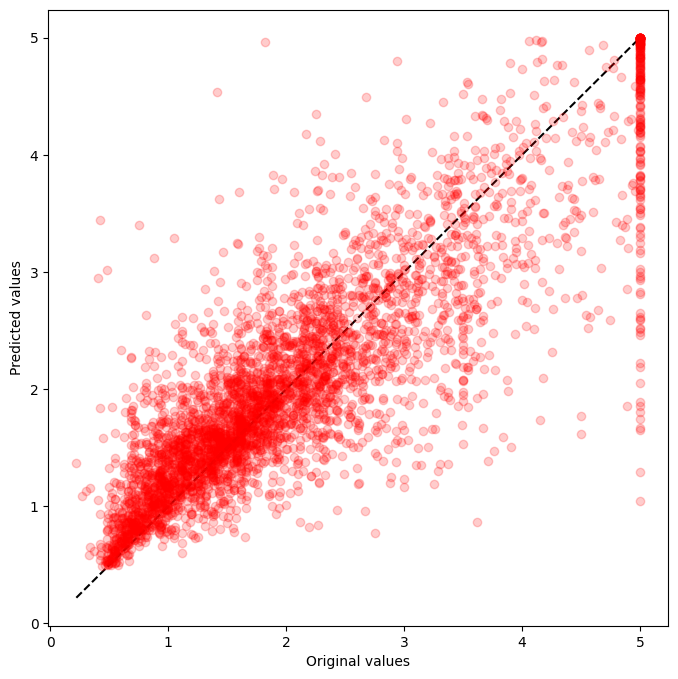

In [122]:
plt.figure(figsize=(8,8))
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], 'k--')
plt.plot(y_test, prediction, 'ro', alpha=.2)
plt.xlabel('Original values')
plt.ylabel('Predicted values')

In [1]:
# # # Save the model to load in future
# %mkdir ExpModels/Exp5

# studnet_model.save('ExpModels/Exp5/studnet_model')
# studnet_model_without_distillation.save('Exp1Models/Exp5/studnet_model_without_distillation')

The syntax of the command is incorrect.


NameError: name 'studnet_model' is not defined

In [80]:
%pwd


'C:\\Users\\Nobody\\Documents\\Anaconda Source Code\\KnowledgeDistillation'

In [99]:
dataset = pd.read_csv("Data/housing.csv")

print(dataset.isna().sum())

print(dataset)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22

In [91]:
from sklearn.impute import SimpleImputer

# reshape total_bedrooms
total_bedrooms_reshaped = np.reshape(dataset["total_bedrooms"].values, (-1, 1))

# replace the missing data with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(total_bedrooms_reshaped)
dataset["total_bedrooms"] = imputer.transform(total_bedrooms_reshaped)


In [92]:
# make the dependent variable be the last one
column_to_move = 'median_house_value'
columns = dataset.columns.tolist()
columns.remove(column_to_move)
columns.remove('ocean_proximity')

columns.append(column_to_move)
dataset = dataset[columns]

# features and dependent variable
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [93]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x[:, 7] = le.fit_transform(x[:, 7])
print(x[:, 7])

[12416. 12411. 11941. ...  1037.  1405.  2752.]


In [95]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [96]:
from sklearn.ensemble import RandomForestRegressor

# train the model using the train sets
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

# predicting the test set results
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8172608426361831